# Problem Statement:
1.What is the main marketing campaign factor that can increase the customer’s decision to subscribe to a term deposit?

2.How accurate can we be in predicting the customer's decision to subscribe to a term deposit?

3.Business interpretation of the different models using Visualisation

4.Business evaluation to convince that our model predicts the best.


# Data Dictionary

### Bank client data:
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
### Related with the last contact of the current campaign:
Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and economic context attributes
Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)
### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Data Collection

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Understanding

In [3]:
df.shape

(41188, 21)

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing

In [7]:
df.rename(columns={'nr.employed':'No_employed','pdays':'Prev_Contacted_Duration','cons.price.idx':'Cust_Price_Index',
                   'cons.conf.idx':'Cust_Conf_Index','euribor3m':'Euribor_3M','y':'Term_Deposit', 
                   'previous':'Prev_Count','marital':'Marital_Status',},inplace=True)

In [8]:
df.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,...,campaign,Prev_Contacted_Duration,Prev_Count,poutcome,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed,Term_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
print(df.education.unique())
df.education.replace(['basic.4y','basic.6y','basic.9y'],['4_class','6_class','9_class'],inplace=True)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [10]:
df[df=="unknown"].count()

age                           0
job                         330
Marital_Status               80
education                  1731
default                    8597
housing                     990
loan                        990
contact                       0
month                         0
day_of_week                   0
duration                      0
campaign                      0
Prev_Contacted_Duration       0
Prev_Count                    0
poutcome                      0
emp.var.rate                  0
Cust_Price_Index              0
Cust_Conf_Index               0
Euribor_3M                    0
No_employed                   0
Term_Deposit                  0
dtype: int64

# Missing Value Treatment

In [11]:
df["job"].replace(to_replace="unknown", value="admin.", inplace=True)
df["Marital_Status"].replace(to_replace="unknown", value="married", inplace=True)
df["education"].replace(to_replace="unknown", value="university.degree", inplace=True)
df["default"].replace(to_replace="unknown", value="Non-Existant", inplace=True)
df["housing"].replace(to_replace="unknown", value="yes", inplace=True)
df["loan"].replace(to_replace="unknown", value="no", inplace=True)

In [12]:
df[df=="unknown"].count()

age                        0
job                        0
Marital_Status             0
education                  0
default                    0
housing                    0
loan                       0
contact                    0
month                      0
day_of_week                0
duration                   0
campaign                   0
Prev_Contacted_Duration    0
Prev_Count                 0
poutcome                   0
emp.var.rate               0
Cust_Price_Index           0
Cust_Conf_Index            0
Euribor_3M                 0
No_employed                0
Term_Deposit               0
dtype: int64

In [13]:
df.isna().sum()

age                        0
job                        0
Marital_Status             0
education                  0
default                    0
housing                    0
loan                       0
contact                    0
month                      0
day_of_week                0
duration                   0
campaign                   0
Prev_Contacted_Duration    0
Prev_Count                 0
poutcome                   0
emp.var.rate               0
Cust_Price_Index           0
Cust_Conf_Index            0
Euribor_3M                 0
No_employed                0
Term_Deposit               0
dtype: int64

# Distribution Of Data

# Combined Analysis

# 1.Univariate Analysis on Categorical Variable

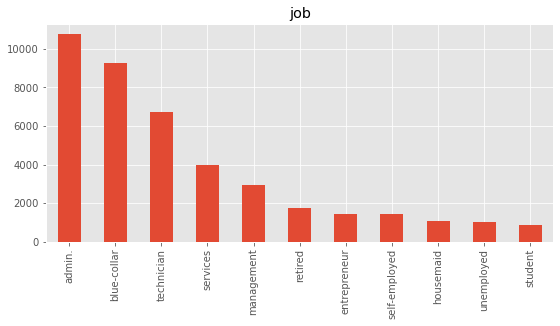

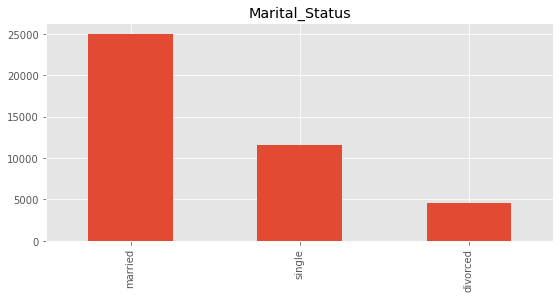

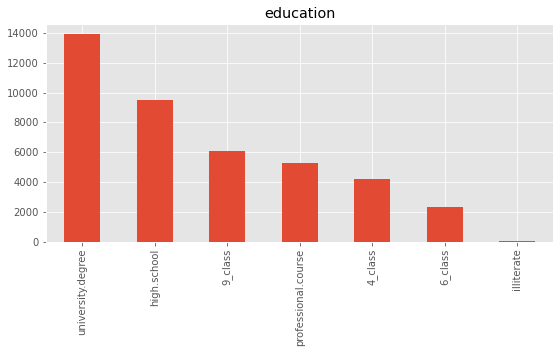

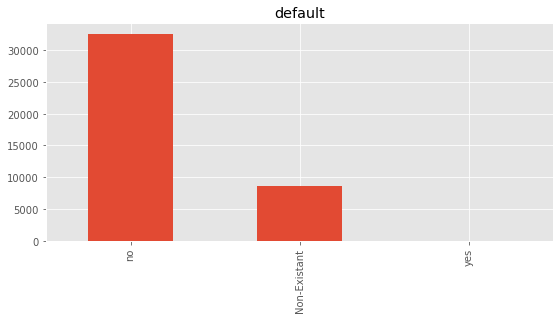

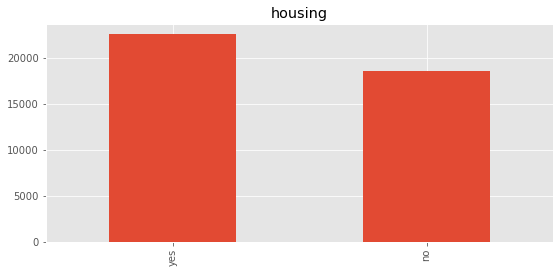

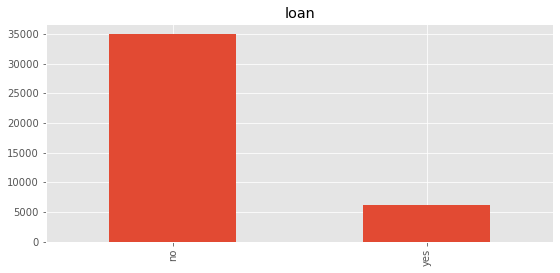

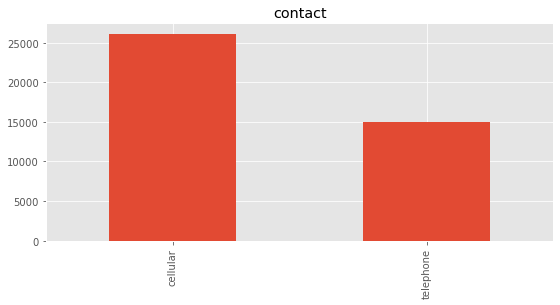

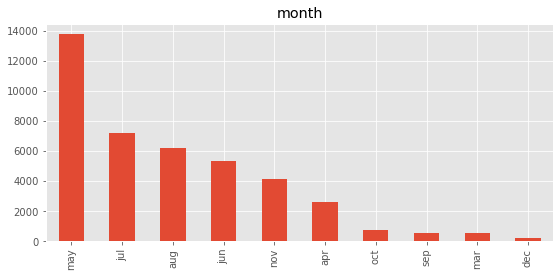

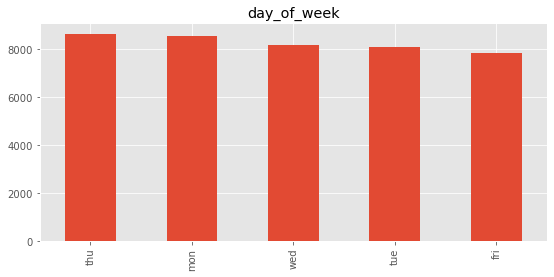

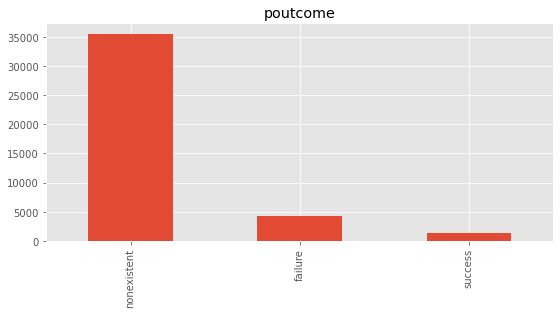

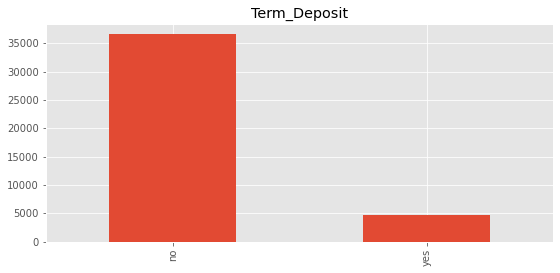

In [14]:
categorical_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot')

for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)


# 2.Univariate Analysis on Numerical Variables

In [15]:
numeric_col=df.select_dtypes(include='number')
numeric_col.head()

,age,duration,campaign,Prev_Contacted_Duration,Prev_Count,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


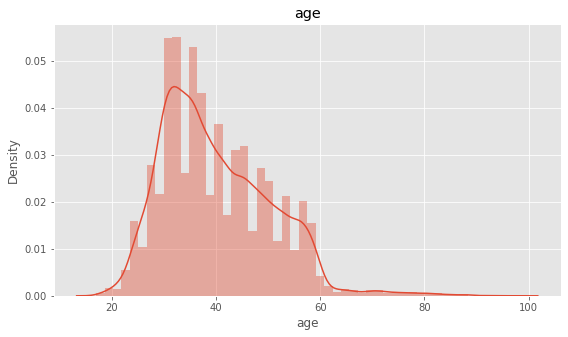

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


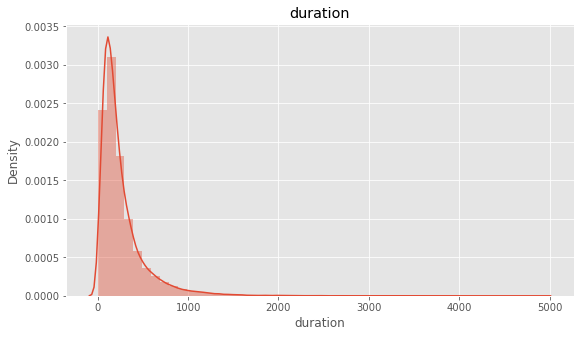

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


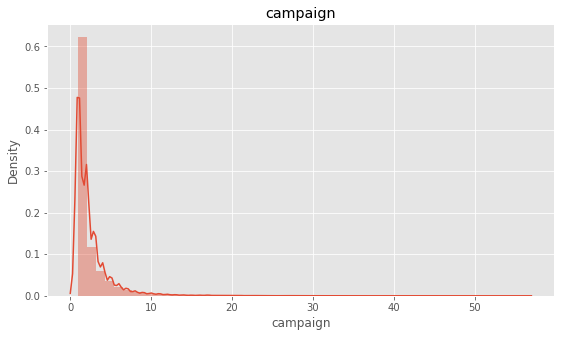

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


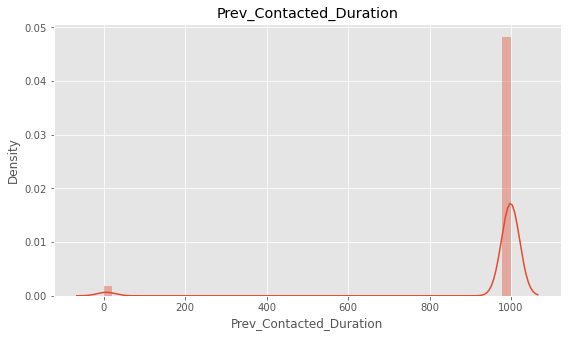

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


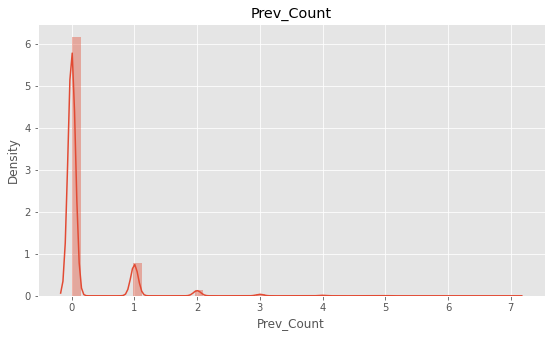

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


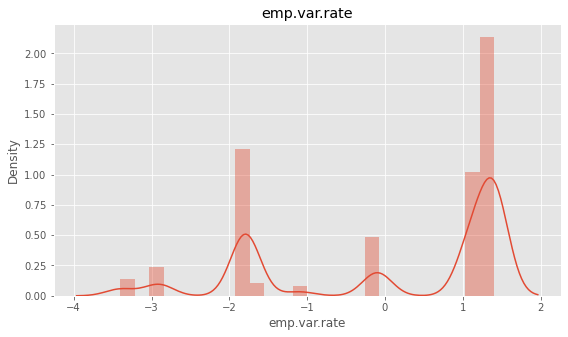

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


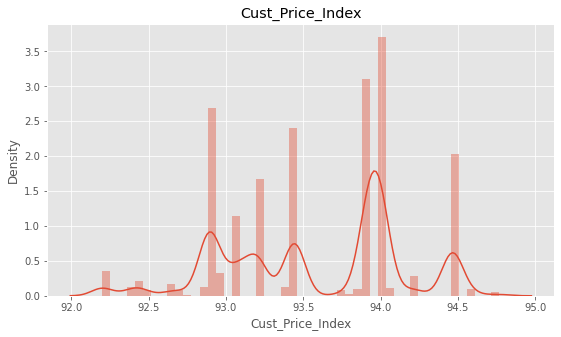

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


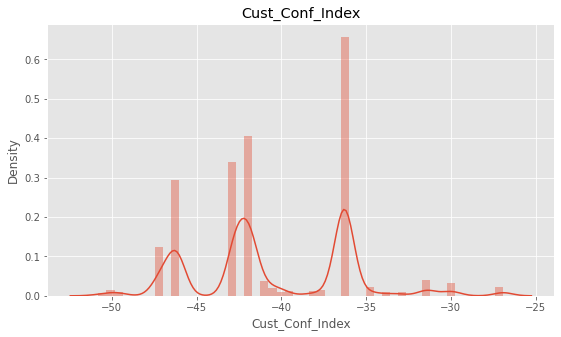

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


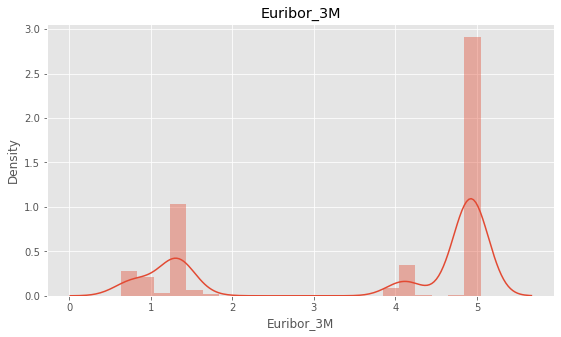

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


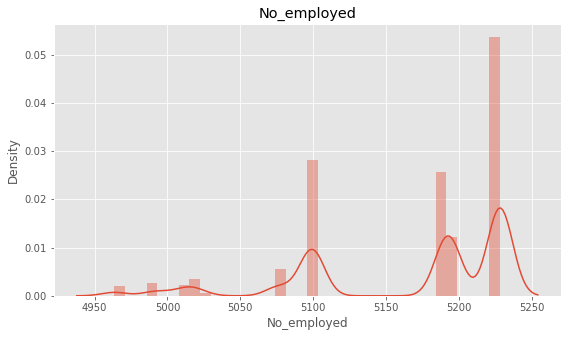

In [16]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

# 3.Bivariate Analysis using categorical variables with respect to our Target variable

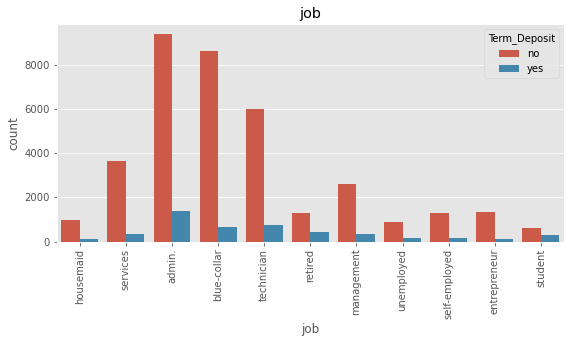

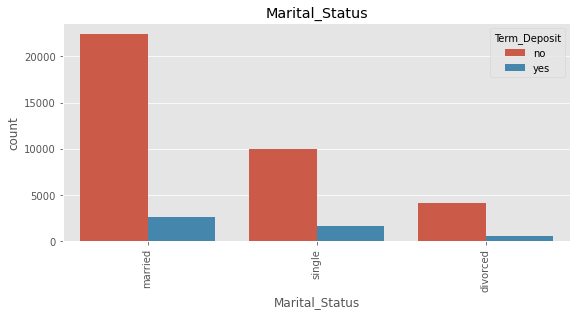

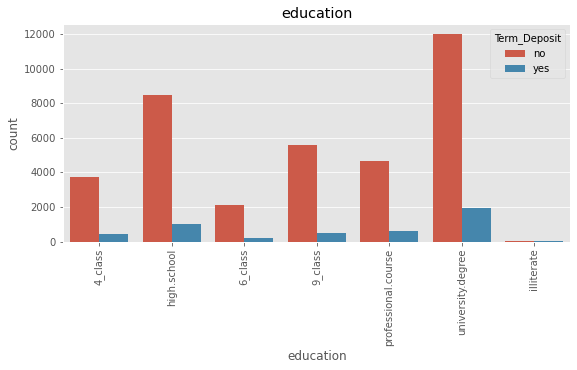

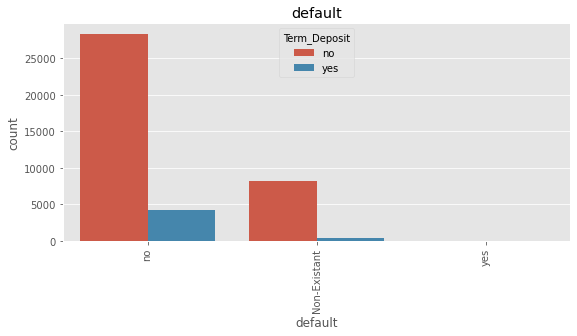

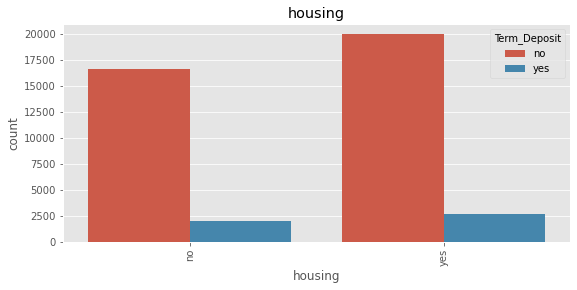

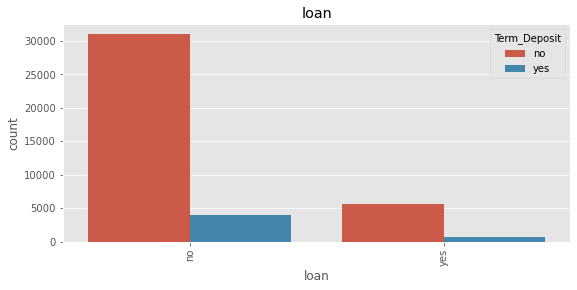

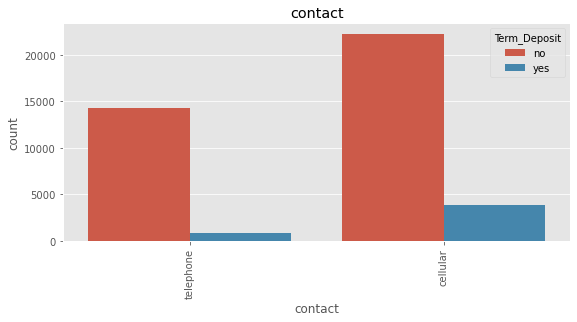

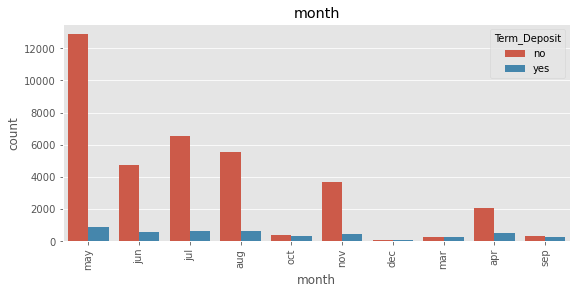

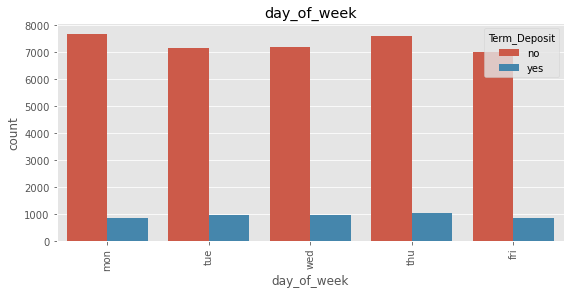

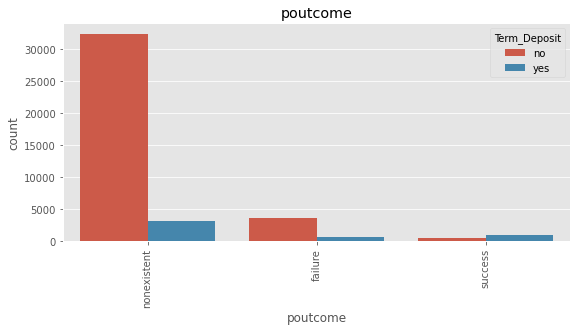

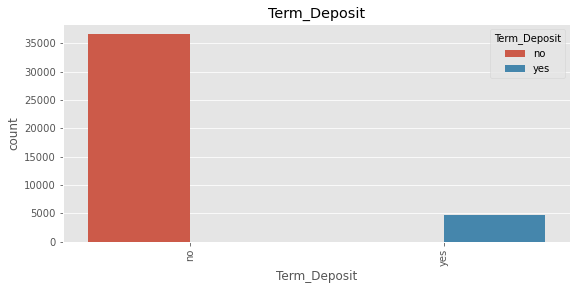

In [17]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['Term_Deposit'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    plt.show()

# 3.Bivariate Analysis using Numerical variables with respect to our Target variable

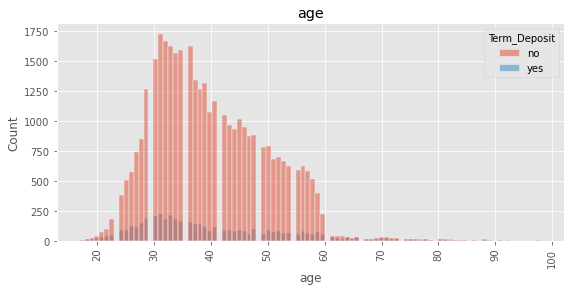

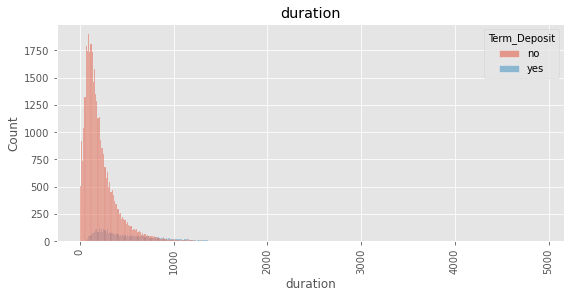

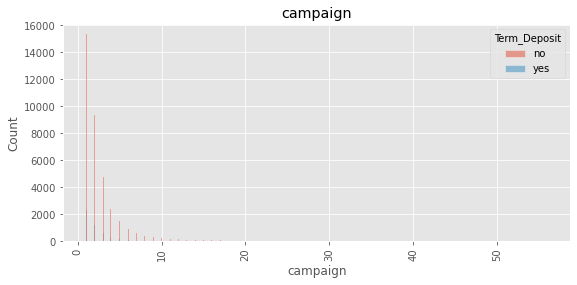

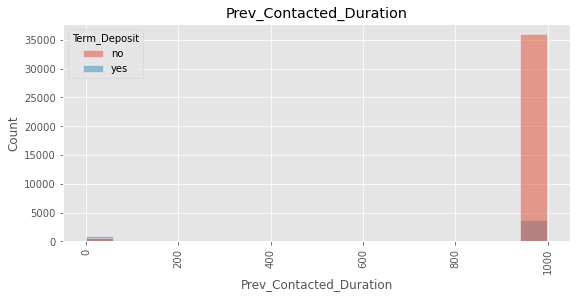

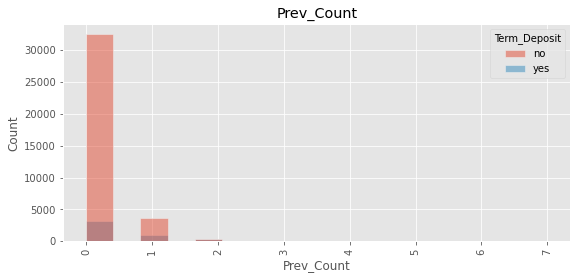

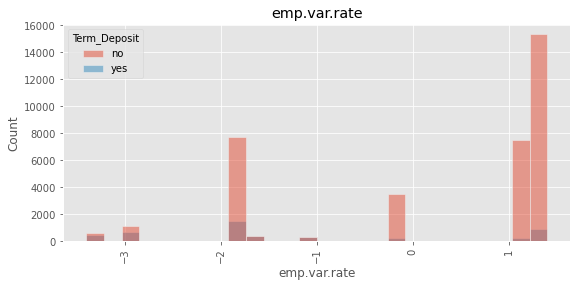

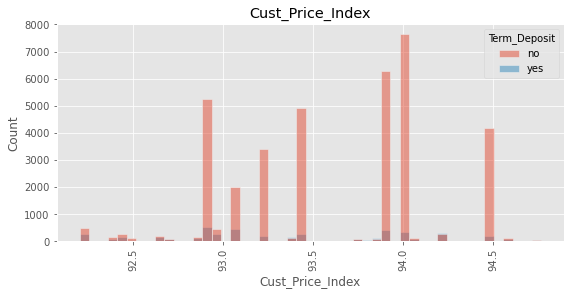

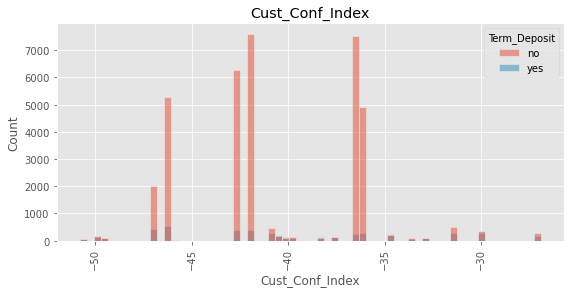

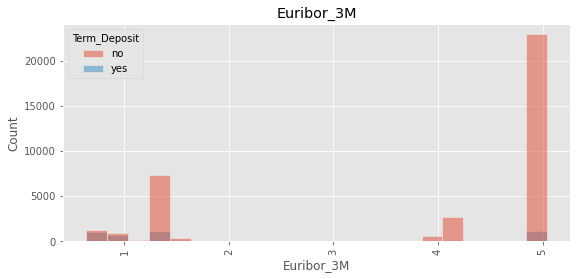

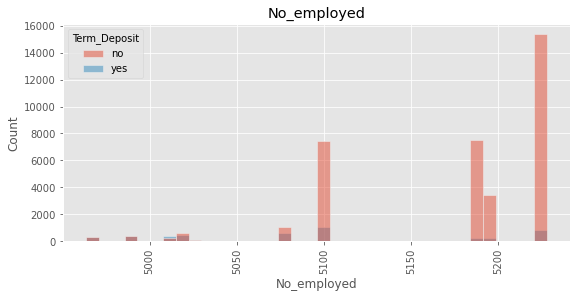

In [18]:
for column in numeric_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(x=df[column],hue=df['Term_Deposit'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    plt.show()

# 5 Multivariate Analysis

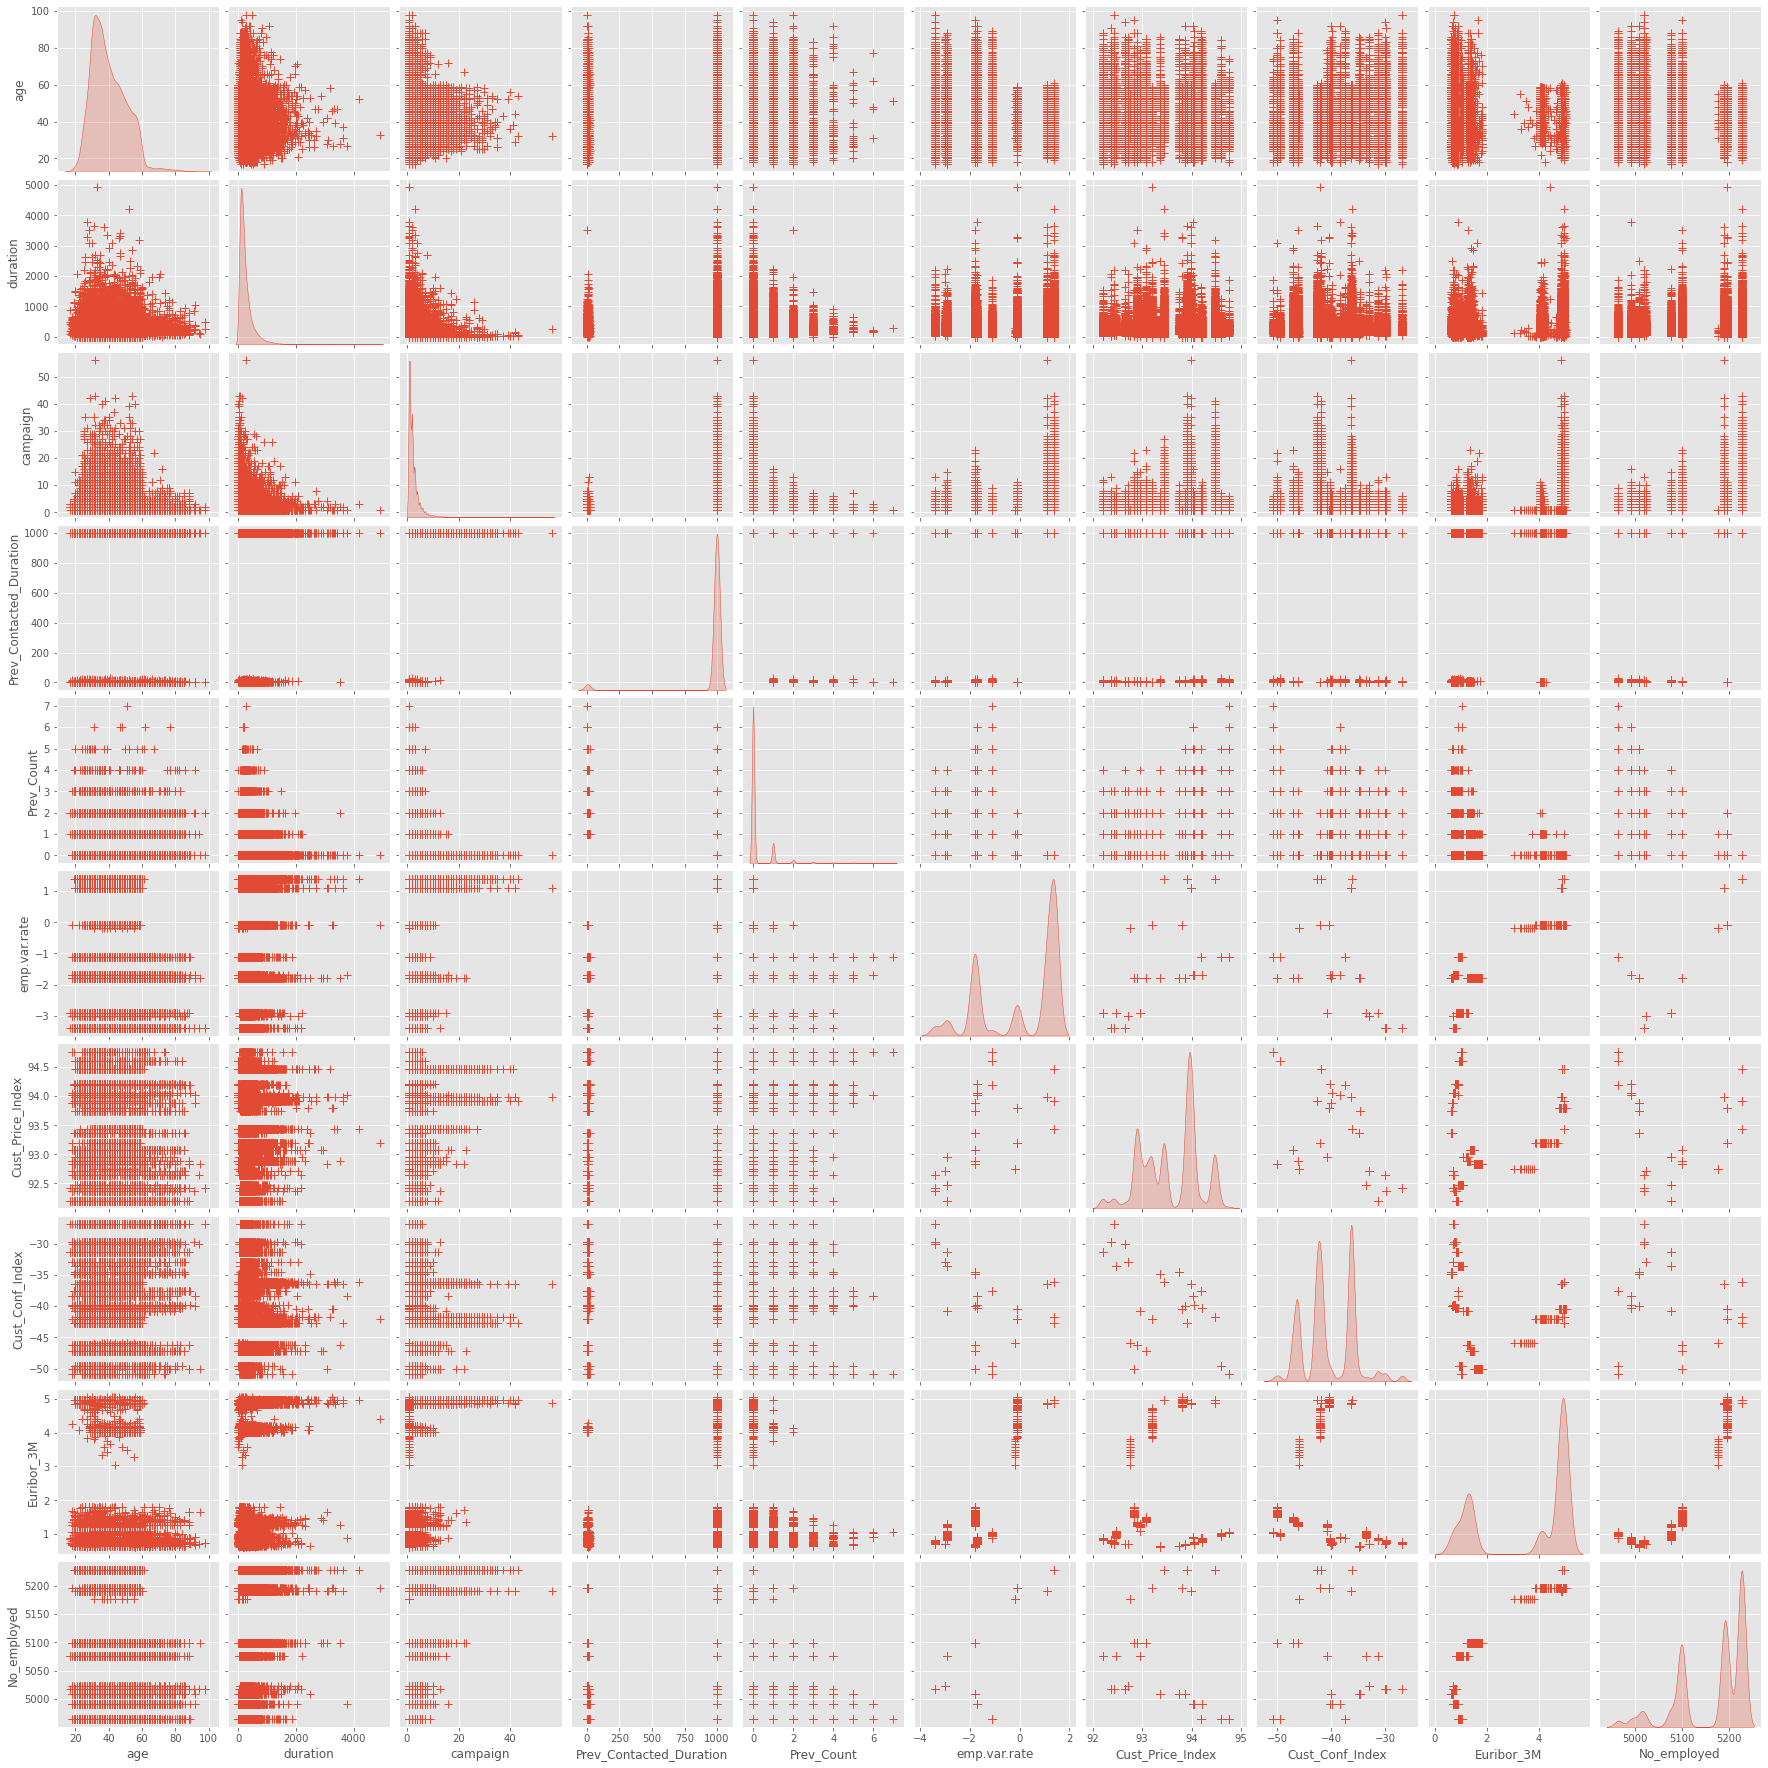

In [19]:
sns.pairplot(numeric_col, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, linewidth=1),
                 diag_kws=dict(shade=True))
plt.show()

# Individual Analysis

#  1.Client Data Analysis

In [20]:
Client=df.iloc[:,0:7]
Client.head()

,age,job,Marital_Status,education,default,housing,loan
0,56,housemaid,married,4_class,no,no,no
1,57,services,married,high.school,Non-Existant,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,6_class,no,no,no
4,56,services,married,high.school,no,no,yes


# 1.1. Age

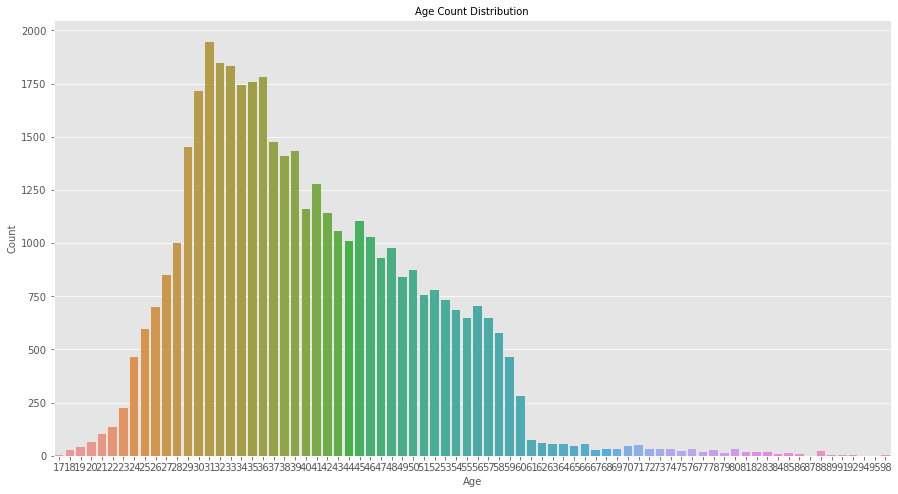

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.countplot(x='age',data=Client)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
sns.despine()

In [22]:
#Observe the max, min, 1,2,3,4 quartile and std.
Client['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


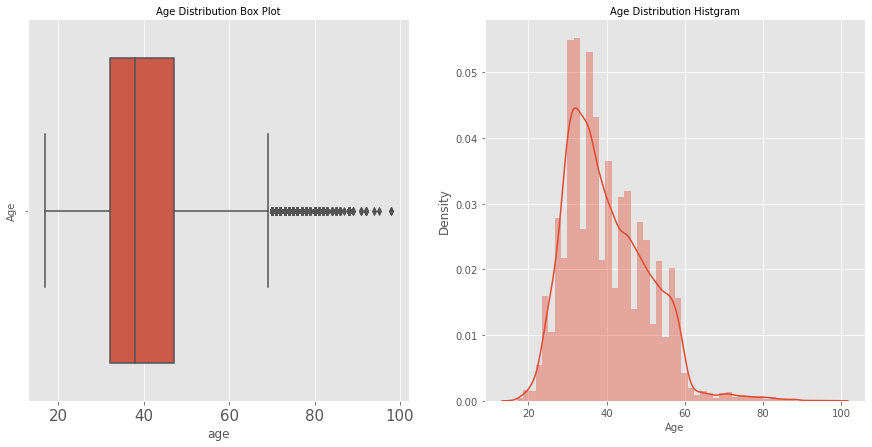

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

sns.boxplot(x = 'age', data = Client, orient = 'v', ax = ax1)
ax1.set_ylabel('Age', fontsize=10)
ax1.set_title('Age Distribution Box Plot', fontsize=10)
ax1.tick_params(labelsize=15)

sns.distplot(Client['age'],ax = ax2)
ax2.set_xlabel('Age', fontsize=10)
ax2.set_title('Age Distribution Histgram', fontsize=10)
ax2.tick_params(labelsize=10)
sns.despine()

In [24]:
# We think the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(Client['age'].std()*100/Client['age'].mean(), 1), ', High middle dispersion')

CV  : 26.0 , High middle dispersion


# 1.2 Jobs 

In [25]:
Client['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

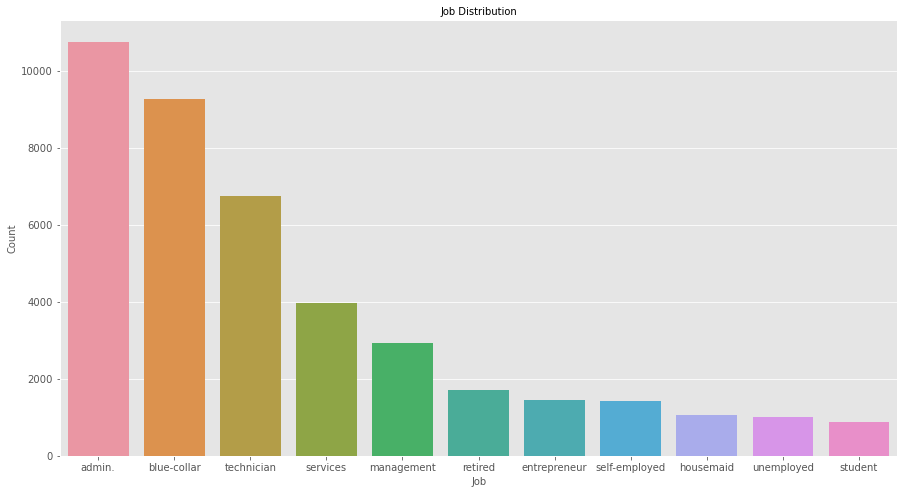

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'job', data = Client,order = Client['job'].value_counts().index)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Distribution', fontsize=10)
sns.despine()

# 1.3 Maritial Status

In [27]:
Client['Marital_Status'].unique()

array(['married', 'single', 'divorced'], dtype=object)

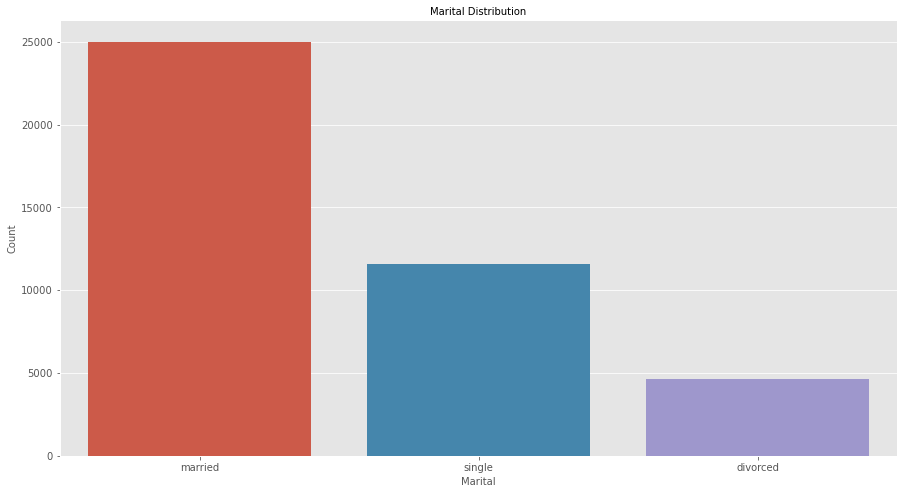

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'Marital_Status', data = Client,order = Client['Marital_Status'].value_counts().index)
ax.set_xlabel('Marital', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital Distribution', fontsize=10)
sns.despine()

 # 1.4 Education

In [29]:
print('Education:', Client['education'].unique())

Education: ['4_class' 'high.school' '6_class' '9_class' 'professional.course'
 'university.degree' 'illiterate']


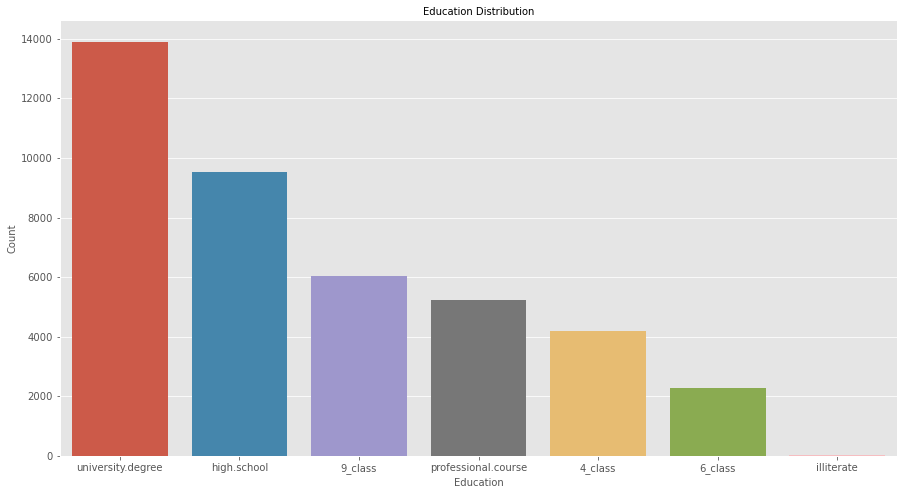

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'education', data = Client,order = Client['education'].value_counts().index)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Distribution', fontsize=10)
sns.despine()

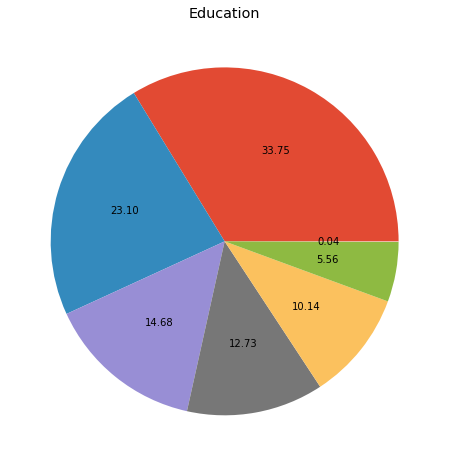

In [31]:
plt.figure(figsize=[20, 8])
plt.title("Education")
plt.pie(Client["education"].value_counts(), autopct='%.2f')
plt.show()

# 1.5 Default, Housing, Loan

In [32]:
print('Default:\n', Client['default'].unique())
print('Housing:\n', Client['housing'].unique())
print('Loan:\n', Client['loan'].unique())

Default:
 ['no' 'Non-Existant' 'yes']
Housing:
 ['no' 'yes']
Loan:
 ['no' 'yes']


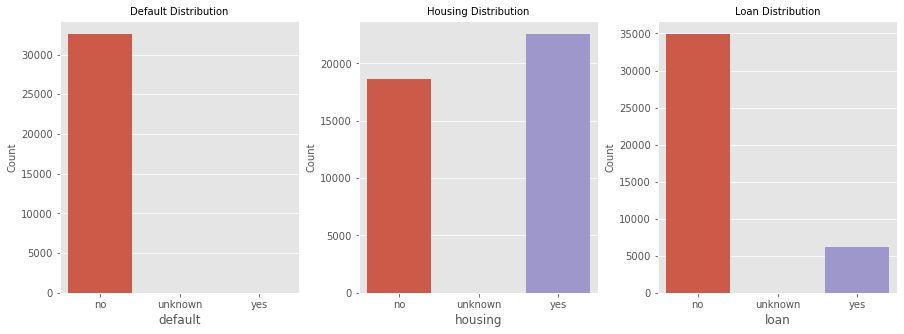

In [33]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'default', data = Client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

# Housing
sns.countplot(x = 'housing', data = Client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing Distribution', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

# Loan
sns.countplot(x = 'loan', data = Client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan Distribution', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

# 2. Related with the last contact of the Client

In [34]:
Client_LC=  df.iloc[: , 7:11]
Client_LC.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


# 2.1 Duration

In [35]:
Client_LC["duration"].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
#CV
print('CV  :',round(Client_LC['duration'].std()*100/Client_LC['duration'].mean(), 1), ', Very High dispersion')

CV  : 100.4 , Very High dispersion


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


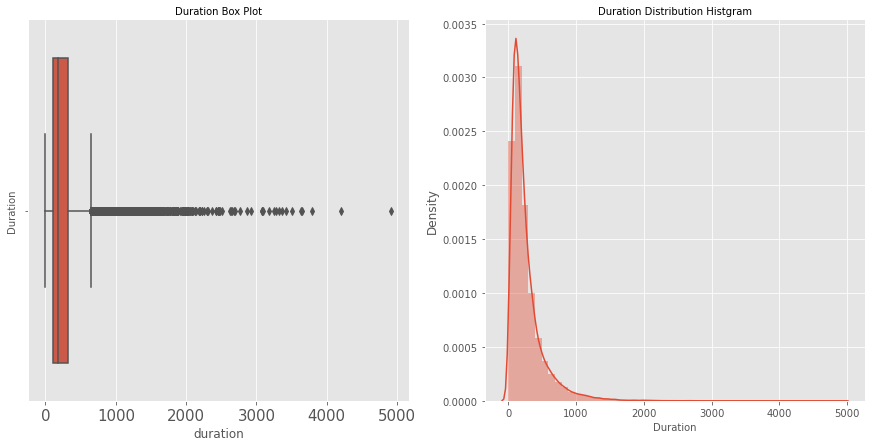

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

sns.boxplot(x = 'duration', data = Client_LC, orient = 'v', ax = ax1)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Duration Box Plot', fontsize=10)
ax1.tick_params(labelsize=15)

sns.distplot(Client_LC['duration'], ax = ax2)
ax2.set_xlabel('Duration', fontsize=10)
ax2.set_title('Duration Distribution Histgram', fontsize=10)
ax2.tick_params(labelsize=10)
sns.despine()

# 2.2  Contact, Months, Days of week

In [38]:
print("Kind of Contact: \n", Client_LC['contact'].unique())
print("\nKind of Months: \n", Client_LC['month'].unique())
print("\nKind of Days: \n", Client_LC['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Kind of Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Kind of Days: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


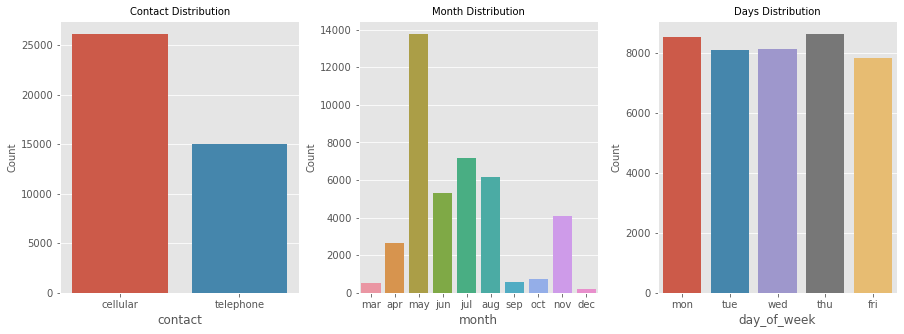

In [39]:
#Contact
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'contact', data = Client_LC, ax = ax1, order = Client_LC['contact'].value_counts().index)
ax1.set_title('Contact Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

# Months
sns.countplot(x = 'month', data = Client_LC, ax = ax2, order= ['mar','apr','may','jun','jul','aug' ,'sep','oct','nov','dec'])
ax2.set_title('Month Distribution', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

# Days
sns.countplot(x = 'day_of_week', data = Client_LC, ax = ax3)
ax3.set_title('Days Distribution', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

# 3. Social and economic context attributes 

In [40]:
bank_se = df.loc[: , ['emp.var.rate','Cust_Price_Index', 'Cust_Conf_Index', 'Euribor_3M', 'No_employed']]
bank_se.head()

,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [41]:
bank_se.describe()

,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


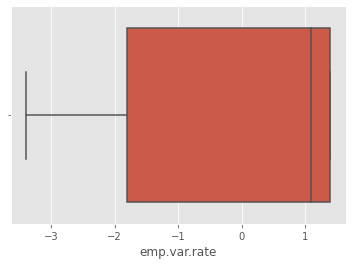

In [42]:
print(bank_se['emp.var.rate'].unique())
print(sns.boxplot(bank_se['emp.var.rate']))

[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
AxesSubplot(0.125,0.125;0.775x0.755)
CV  : 0.6 ,low dispersion


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


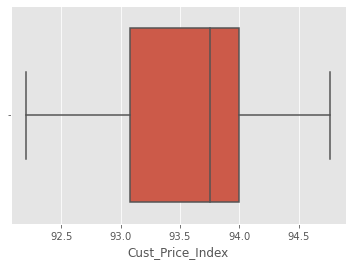

In [43]:
print(bank_se['Cust_Price_Index'].unique())
print(sns.boxplot(bank_se['Cust_Price_Index']))
print('CV  :',round(bank_se['Cust_Price_Index'].std()*100/bank_se['Cust_Price_Index'].mean(), 1), ',low dispersion')

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
AxesSubplot(0.125,0.125;0.775x0.755)
CV  : -11.4 , Moderately low dispersion


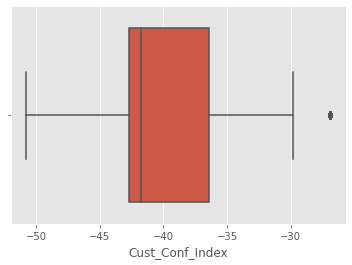

In [44]:
print(bank_se['Cust_Conf_Index'].unique())
print(sns.boxplot(bank_se['Cust_Conf_Index']))
print('CV  :',round(bank_se['Cust_Conf_Index'].std()*100/bank_se['Cust_Conf_Index'].mean(), 1), ', Moderately low dispersion')

[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.813 0.809 0.803 

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


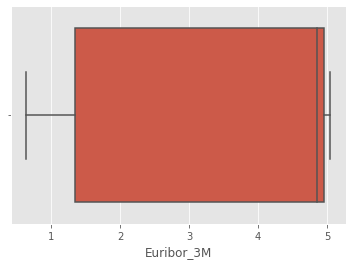

In [45]:
print(bank_se['Euribor_3M'].unique())
print(sns.boxplot(bank_se['Euribor_3M']))
print('CV  :',round(bank_se['Euribor_3M'].std()*100/bank_se['Euribor_3M'].mean(), 1), ', High dispersion')

[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
AxesSubplot(0.125,0.125;0.775x0.755)
CV  : 1.4 , low dispersion


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


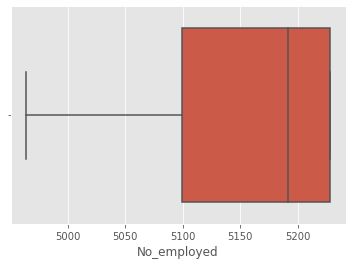

In [46]:
print(bank_se['No_employed'].unique())
print(sns.boxplot(bank_se['No_employed']))
#CV
print('CV  :',round(bank_se['No_employed'].std()*100/bank_se['No_employed'].mean(), 1), ', low dispersion')

# 4. Other attributes

In [47]:
bank_o = df.loc[: , ['campaign', 'Prev_Contacted_Duration','Prev_Count', 'poutcome']]
bank_o.head()

,campaign,Prev_Contacted_Duration,Prev_Count,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [48]:
for i in bank_o.columns:
    print(i,bank_o[i].unique())

campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Prev_Contacted_Duration [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Prev_Count [0 1 2 3 4 5 6 7]
poutcome ['nonexistent' 'failure' 'success']


C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign', ylabel='count'>

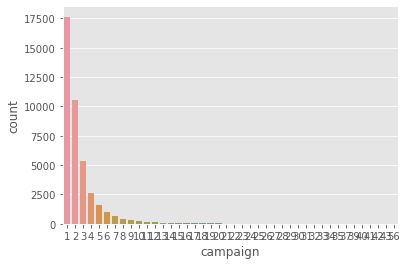

In [49]:
sns.countplot(df["campaign"])

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prev_Contacted_Duration', ylabel='count'>

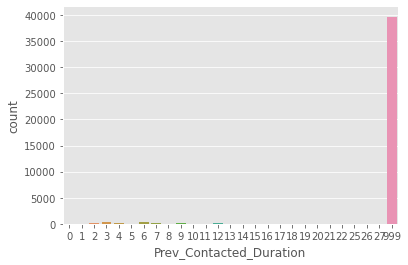

In [50]:
sns.countplot(df["Prev_Contacted_Duration"])

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prev_Count', ylabel='count'>

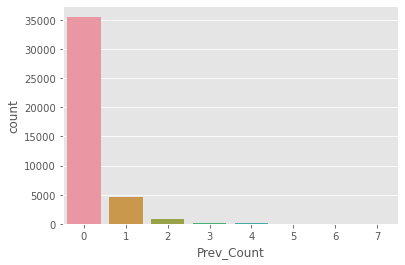

In [51]:
sns.countplot(df["Prev_Count"])

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

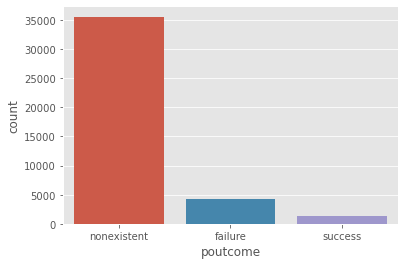

In [52]:
sns.countplot(df["poutcome"])

# Data Preparation and Feature Engineering

# On Client Data

In [53]:
#Label Encoding Categorical Variables
labelencoder_X = LabelEncoder()
Client['job']      = labelencoder_X.fit_transform(Client['job']) 
Client['Marital_Status']  = labelencoder_X.fit_transform(Client['Marital_Status']) 
Client['education']= labelencoder_X.fit_transform(Client['education']) 
Client['default']  = labelencoder_X.fit_transform(Client['default']) 
Client['housing']  = labelencoder_X.fit_transform(Client['housing']) 
Client['loan']     = labelencoder_X.fit_transform(Client['loan'])

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


new skew of age: 0.1258388128756888


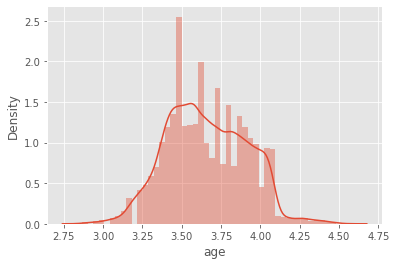

<Figure size 432x288 with 0 Axes>

In [54]:
#Transformation On Age Attribute
#After Trying all type of transformations We have found that log transformation is the best tranformation technique for age
Client['age'] = np.log(Client['age'])
sns.distplot(Client['age'])
print('new skew of age:', Client['age'].skew())
fig = plt.figure()

In [55]:
Client.head()

,age,job,Marital_Status,education,default,housing,loan
0,4.025352,3,1,0,1,0,0
1,4.043051,7,1,3,0,0,0
2,3.610918,7,1,3,1,1,0
3,3.688879,0,1,1,1,0,0
4,4.025352,7,1,3,1,0,1


# On Client Last Contacted Data

In [56]:
Client_LC['contact']     = labelencoder_X.fit_transform(Client_LC['contact']) 
Client_LC['month']       = labelencoder_X.fit_transform(Client_LC['month']) 
Client_LC['day_of_week'] = labelencoder_X.fit_transform(Client_LC['day_of_week'])

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


new skew of age: 1.199568250863167


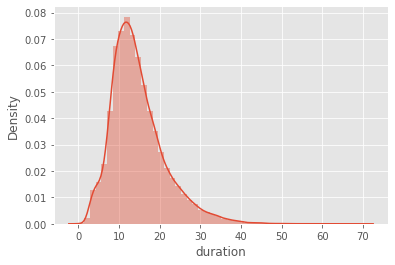

<Figure size 432x288 with 0 Axes>

In [57]:
Client_LC['duration'] = np.sqrt(Client_LC['duration'])
sns.distplot(Client_LC['duration'])
print('new skew of age:', Client_LC['duration'].skew())
fig = plt.figure()

In [58]:
Client_LC.head()

,contact,month,day_of_week,duration
0,1,6,1,16.155494
1,1,6,1,12.206556
2,1,6,1,15.033296
3,1,6,1,12.288206
4,1,6,1,17.521415


# On Social and Economic Attributes

In [59]:
#As of now there is no need to do any feature engineering techniques on them

# On Other Attributes

In [60]:
bank_o['campaign'] = labelencoder_X.fit_transform(bank_o['campaign'])
bank_o['Prev_Contacted_Duration'] = labelencoder_X.fit_transform(bank_o['Prev_Contacted_Duration'])
bank_o['Prev_Count'] = labelencoder_X.fit_transform(bank_o['Prev_Count'])
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])

In [61]:
bank_o.head()

,campaign,Prev_Contacted_Duration,Prev_Count,poutcome
0,0,26,0,1
1,0,26,0,1
2,0,26,0,1
3,0,26,0,1
4,0,26,0,1


In [62]:
X=pd.concat([Client,Client_LC,bank_se,bank_o],axis=1)

In [63]:
X.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed,campaign,Prev_Contacted_Duration,Prev_Count,poutcome
0,4.025352,3,1,0,1,0,0,1,6,1,16.155494,1.1,93.994,-36.4,4.857,5191.0,0,26,0,1
1,4.043051,7,1,3,0,0,0,1,6,1,12.206556,1.1,93.994,-36.4,4.857,5191.0,0,26,0,1
2,3.610918,7,1,3,1,1,0,1,6,1,15.033296,1.1,93.994,-36.4,4.857,5191.0,0,26,0,1
3,3.688879,0,1,1,1,0,0,1,6,1,12.288206,1.1,93.994,-36.4,4.857,5191.0,0,26,0,1
4,4.025352,7,1,3,1,0,1,1,6,1,17.521415,1.1,93.994,-36.4,4.857,5191.0,0,26,0,1


In [64]:
Y=pd.get_dummies(df["Term_Deposit"],drop_first=True)
Y.rename(columns={"yes":"Term_Deposit"},inplace=True)
Y.head()

,Term_Deposit
0,0
1,0
2,0
3,0
4,0


In [65]:
Z=pd.concat([X,Y],axis=1)

# Correlation between variables

In [66]:
# Correlation between variables with respect to the target variable
Z.corr()['Term_Deposit'].drop('Term_Deposit').sort_values()

No_employed               -0.354678
Prev_Contacted_Duration   -0.320945
Euribor_3M                -0.307771
emp.var.rate              -0.298334
contact                   -0.144773
Cust_Price_Index          -0.136211
campaign                  -0.066532
month                     -0.006065
loan                      -0.004466
age                        0.002676
housing                    0.011085
day_of_week                0.015967
job                        0.025482
Marital_Status             0.045849
Cust_Conf_Index            0.054878
education                  0.057268
default                    0.099199
poutcome                   0.129789
Prev_Count                 0.230181
duration                   0.404378
Name: Term_Deposit, dtype: float64

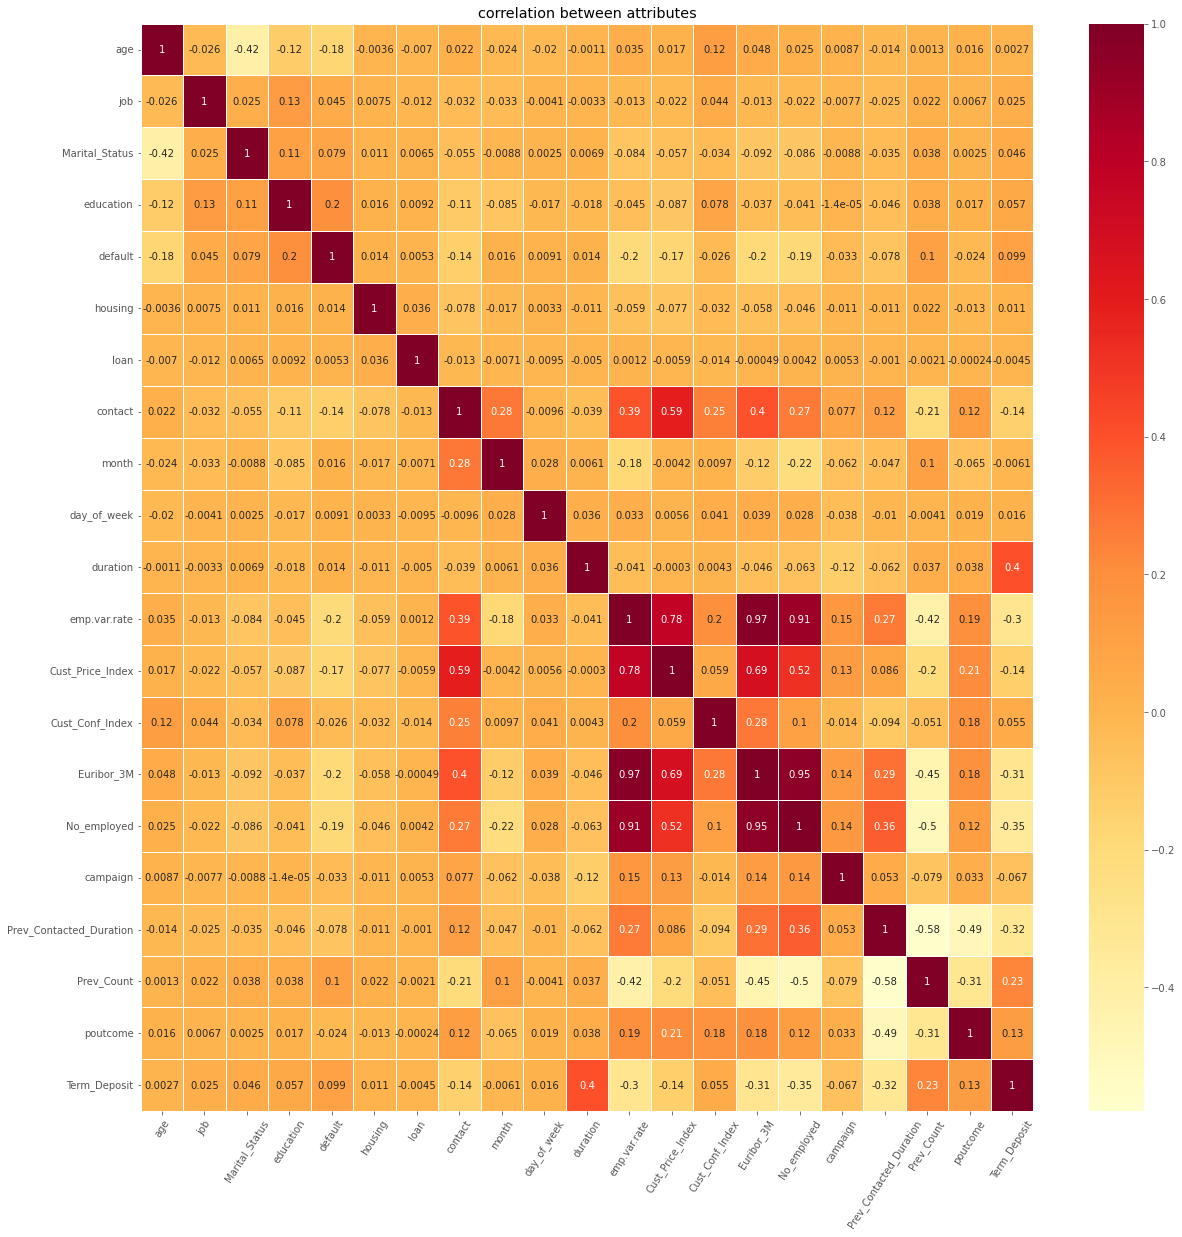

In [67]:
for i in list(Z.columns):
    if Z[i].dtype == 'object':
        Z[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(20, 20))
plt.title('correlation between attributes')
sns.heatmap(Z.corr(),lw=1,linecolor='white',cmap='YlOrRd',annot=True)
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = Z.corr()

<AxesSubplot:>

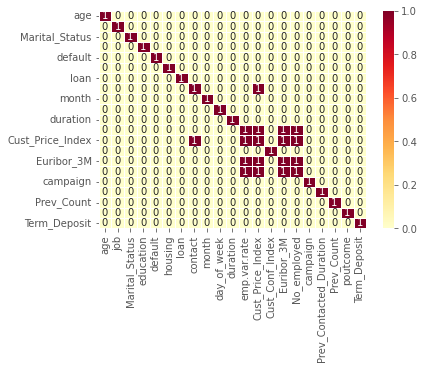

In [68]:
sns.heatmap(Z.corr()>0.5,lw=1,linecolor='white',cmap='YlOrRd',annot=True)

# Statistical Analysis

# Chi Square Test

In [69]:
import scipy.stats as stats
import statistics as stat
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [70]:
categorical_col

Index(['job', 'Marital_Status', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'Term_Deposit'],
      dtype='object')

In [71]:
df_cat=df.select_dtypes('object')
df_cat.head()

,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,poutcome,Term_Deposit
0,housemaid,married,4_class,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,Non-Existant,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,6_class,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [72]:
for i in df_cat.columns[0:10]:
    table=pd.crosstab(df_cat[i],df['Term_Deposit'])
    stat,pval,dof,arr=chi2_contingency(table)
    print(i,' p-value:',pval)
    print()

job  p-value: 6.808199923441661e-200

Marital_Status  p-value: 5.915954286692898e-27

education  p-value: 8.692046071480118e-39

default  p-value: 5.1619579513916376e-89

housing  p-value: 0.025479312776658963

loan  p-value: 0.37633537946635287

contact  p-value: 1.5259856523129964e-189

month  p-value: 0.0

day_of_week  p-value: 2.9584820052785324e-05

poutcome  p-value: 0.0



### Statistical Analysis for numerical variables

In [73]:
df_num=df.select_dtypes(include='number')
df_num.head()

,age,duration,campaign,Prev_Contacted_Duration,Prev_Count,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [74]:
df_num.describe()

,age,duration,campaign,Prev_Contacted_Duration,Prev_Count,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [75]:
for i in df_num.columns:
    df_no_num=df[df['Term_Deposit']=='no'][i]
    df_yes_num=df[df['Term_Deposit']=='yes'][i]
    sta,pval=stats.shapiro(df_num[i])
    Lsta,Lpval=stats.levene(df_no_num,df_yes_num)
    print(i,'shapiro p-value:',pval)
    print(i,'levene p-value:',Lpval)
    print('skew:',df_num[i].skew())
    print()

age shapiro p-value: 0.0
age levene p-value: 1.0963980218719163e-150
skew: 0.7846968157646645

duration shapiro p-value: 0.0
duration levene p-value: 0.0
skew: 3.263141255262832

campaign shapiro p-value: 0.0
campaign levene p-value: 1.4382104984343734e-29
skew: 4.762506697067009

Prev_Contacted_Duration shapiro p-value: 0.0
Prev_Contacted_Duration levene p-value: 0.0
skew: -4.922189916418162

Prev_Count shapiro p-value: 0.0
Prev_Count levene p-value: 0.0
skew: 3.8320422428611836

emp.var.rate shapiro p-value: 0.0
emp.var.rate levene p-value: 3.1647515436444623e-07
skew: -0.7240955492472556

Cust_Price_Index shapiro p-value: 0.0
Cust_Price_Index levene p-value: 2.0231256553645675e-53
skew: -0.23088765135788006

Cust_Conf_Index shapiro p-value: 0.0
Cust_Conf_Index levene p-value: 3.7470625338730136e-227
skew: 0.30317985874819237

Euribor_3M shapiro p-value: 0.0
Euribor_3M levene p-value: 1.0867852390321454e-06
skew: -0.7091879563778298

No_employed shapiro p-value: 0.0
No_employed leven

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Mannwhitney-U test

In [76]:
# Null : Variables are Independent 

# Altr : Variables are Dependent

In [77]:
for i in df_num.columns:
    df_no_num=df[df['Term_Deposit']=='no'][i]
    df_yes_num=df[df['Term_Deposit']=='yes'][i]
    
    print(i,':',stats.mannwhitneyu(df_no_num,df_yes_num))
    print()

age : MannwhitneyuResult(statistic=86626886.5, pvalue=0.01608053832750354)

duration : MannwhitneyuResult(statistic=30788443.5, pvalue=0.0)

campaign : MannwhitneyuResult(statistic=94153911.5, pvalue=3.4185266318612675e-38)

Prev_Contacted_Duration : MannwhitneyuResult(statistic=101197910.0, pvalue=0.0)

Prev_Count : MannwhitneyuResult(statistic=66257901.5, pvalue=0.0)

emp.var.rate : MannwhitneyuResult(statistic=121548923.0, pvalue=0.0)

Cust_Price_Index : MannwhitneyuResult(statistic=103540748.5, pvalue=9.572608866919173e-136)

Cust_Conf_Index : MannwhitneyuResult(statistic=78464908.5, pvalue=5.901951166896614e-17)

Euribor_3M : MannwhitneyuResult(statistic=126080978.5, pvalue=0.0)

No_employed : MannwhitneyuResult(statistic=127016916.0, pvalue=0.0)



# Handling Imbalanced Data

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Term_Deposit', ylabel='count'>

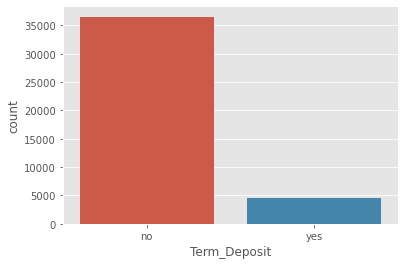

In [78]:
sns.countplot(df["Term_Deposit"])

In [79]:
Y["Term_Deposit"].value_counts()*100/Y["Term_Deposit"].count()

0    88.734583
1    11.265417
Name: Term_Deposit, dtype: float64

In [80]:
#We can see the data is highly imbalanced with a ratio of 88:11 
#We will use Smote Technique to balance the data
oversample = SMOTE()
X1,Y1 = oversample.fit_resample(X,Y)

C:\Users\Swapnil Pattanshetty\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Term_Deposit', ylabel='count'>

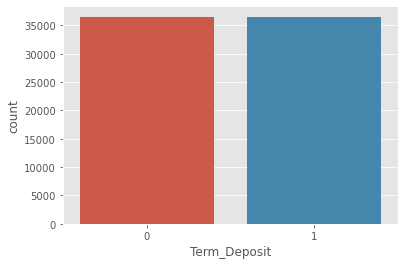

In [81]:
sns.countplot(Y1["Term_Deposit"])

In [82]:
Y1["Term_Deposit"].value_counts()*100/Y1["Term_Deposit"].count()

0    50.0
1    50.0
Name: Term_Deposit, dtype: float64

In [83]:
X1.count()

age                        73096
job                        73096
Marital_Status             73096
education                  73096
default                    73096
housing                    73096
loan                       73096
contact                    73096
month                      73096
day_of_week                73096
duration                   73096
emp.var.rate               73096
Cust_Price_Index           73096
Cust_Conf_Index            73096
Euribor_3M                 73096
No_employed                73096
campaign                   73096
Prev_Contacted_Duration    73096
Prev_Count                 73096
poutcome                   73096
dtype: int64

In [84]:
X1.shape

(73096, 20)

In [85]:
Y1.shape

(73096, 1)

# Model Building

In [86]:
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Train_Test_Split

In [87]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (32950, 21)
y_train (32950, 1)
X_test (8238, 21)
y_test (8238, 1)


# Logistic Regression 

In [88]:
sc_X=StandardScaler()
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print("Logistic Regression:\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, logpred))
print("\nAccuracy:")
print(round(accuracy_score(y_test, logpred),2)*100)
print(classification_report(y_test,logpred))
print("\nCross Validation Score:")
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)

Logistic Regression:

Confusion matrix:
[[7092  218]
 [ 544  384]]

Accuracy:
91.0
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.64      0.41      0.50       928

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Cross Validation Score:
0.9122306525037935


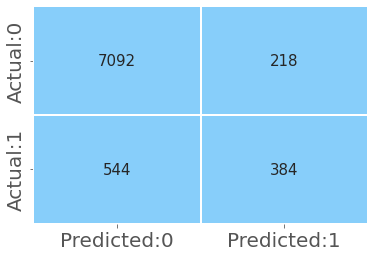

In [89]:
cm = confusion_matrix(y_test, logpred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

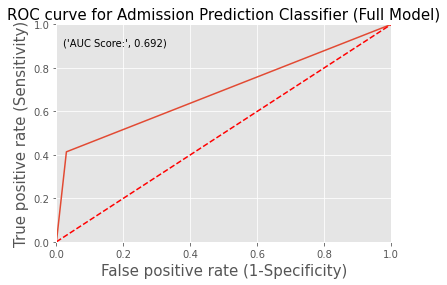

In [90]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logpred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, logpred),4)))
plt.grid(True)

# KNN

In [91]:

knn_class=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_mod=knn_class.fit(X_train,y_train)

In [92]:
# classification report 
from sklearn.metrics import classification_report
def classification_report_func(model,data_x,data_y):
    y_pred=model.predict(data_x)
    print(classification_report(data_y,y_pred))

In [93]:
#  training report
classification_report_func(knn_mod,X_train,y_train)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     29238
           1       0.80      0.63      0.71      3712

    accuracy                           0.94     32950
   macro avg       0.87      0.81      0.84     32950
weighted avg       0.94      0.94      0.94     32950



In [94]:
classification_report_func(knn_mod,X_test,y_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.53      0.38      0.44       928

    accuracy                           0.89      8238
   macro avg       0.73      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238



In [95]:
## confusion matrix

def plot_confusion_matrix(model,test_data):
    y_predict = model.predict(test_data)
    
    cm = confusion_matrix(y_test,y_predict)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':15})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

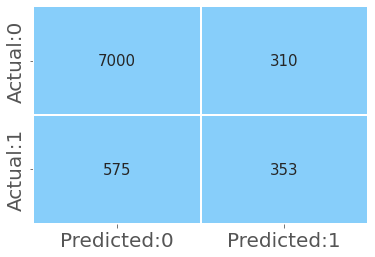

In [96]:
plot_confusion_matrix(knn_mod,test_data=X_test)

In [97]:
# plot roc curve

def plot_roc(model,test_data):
        y_pred_prob = model.predict_proba(test_data)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC curve', fontsize = 15)
        plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
        plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
        plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
        plt.grid(True)

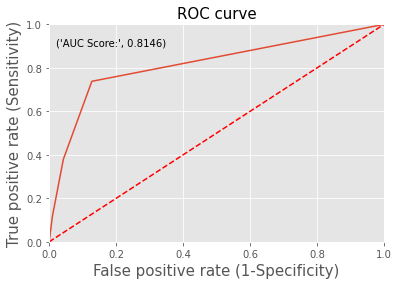

In [98]:
plot_roc(knn_mod,test_data=X_test)

# Random Forest


In [99]:
rf_classification = RandomForestClassifier(n_estimators = 100, random_state = 10)

In [100]:
rf_model = rf_classification.fit(X_train, y_train)
def get_train_report(model):
    train_pred = model.predict(X_train)
    return classification_report(y_train,train_pred)

train_report = get_train_report(rf_model)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29238
           1       1.00      1.00      1.00      3712

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [101]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return classification_report(y_test,test_pred)
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.64      0.50      0.56       928

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



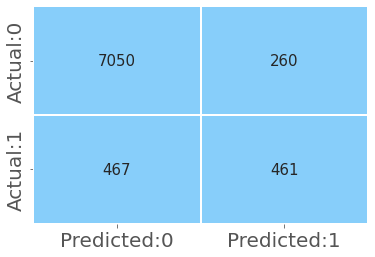

In [102]:
plot_confusion_matrix(rf_model,test_data=X_test)

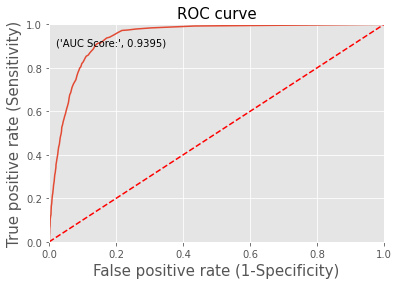

In [103]:
plot_roc(rf_model,test_data=X_test)

# After Balancing the data using SMOTE

# Logistic Regression

In [104]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state = 10, test_size = 0.2)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (58476, 20)
y_train (58476, 1)
X_test (14620, 20)
y_test (14620, 1)


In [105]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print("Logistic Regression:\n")
print("Confusion matrix:")
print(confusion_matrix(y_test, logpred))
print("\nAccuracy:")
print(round(accuracy_score(y_test, logpred),2)*100)
print(classification_report(y_test,logpred))
print("\nCross Validation Score:")
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)

Logistic Regression:

Confusion matrix:
[[6411  921]
 [ 749 6539]]

Accuracy:
89.0
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7332
           1       0.88      0.90      0.89      7288

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620


Cross Validation Score:
0.8825159148341999


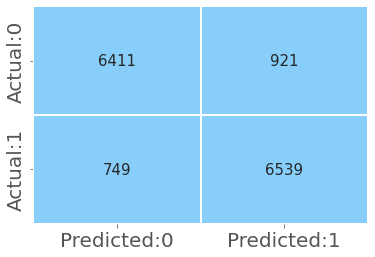

In [106]:
cm = confusion_matrix(y_test, logpred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

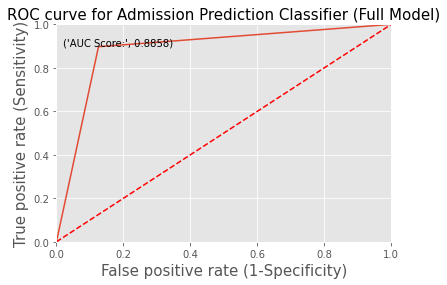

In [107]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logpred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, logpred),4)))
plt.grid(True)

# KNN

In [108]:

knn_class=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_mod=knn_class.fit(X_train,y_train)

In [109]:
#  training report
classification_report_func(knn_mod,X_train,y_train)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     29216
           1       0.93      0.98      0.96     29260

    accuracy                           0.95     58476
   macro avg       0.96      0.95      0.95     58476
weighted avg       0.96      0.95      0.95     58476



In [110]:
# Testing report
classification_report_func(knn_mod,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7332
           1       0.89      0.96      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



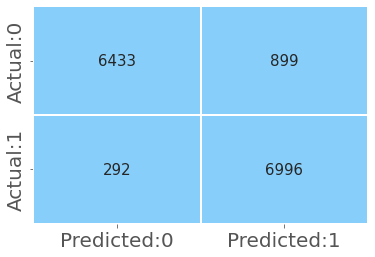

In [111]:
plot_confusion_matrix(knn_mod,test_data = X_test)

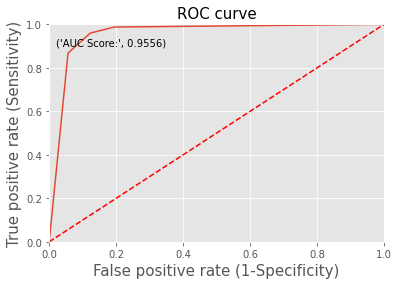

In [112]:
plot_roc(knn_mod, test_data = X_test)

# Random Forest

In [113]:
rf_classification = RandomForestClassifier(n_estimators = 100, random_state = 10)

In [114]:
rf_model = rf_classification.fit(X_train, y_train)

In [115]:
train_report = get_train_report(rf_model)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29216
           1       1.00      1.00      1.00     29260

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476



In [116]:
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7332
           1       0.92      0.98      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



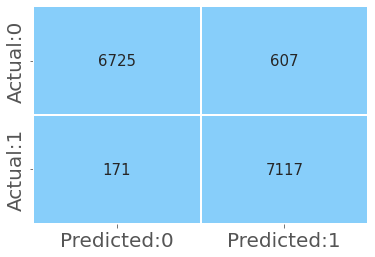

In [117]:
plot_confusion_matrix(rf_model,test_data=X_test)

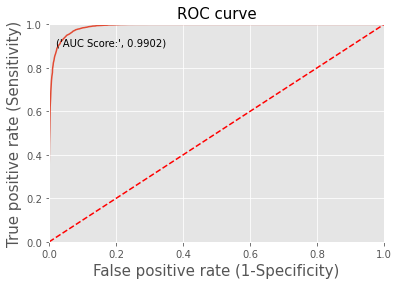

In [118]:
plot_roc(rf_model,test_data=X_test)